In [8]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [7]:
!pip install plotly

In [216]:
df.shape

(100, 3)

In [15]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [16]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [215]:
df.head()

,feature1,feature2,target
0,0.672568,1.138324,21.350534
1,2.195184,-0.246392,93.498735
2,0.469296,-0.328449,11.947523
3,0.103226,0.767110,5.244163
4,0.430672,-0.065819,9.694020


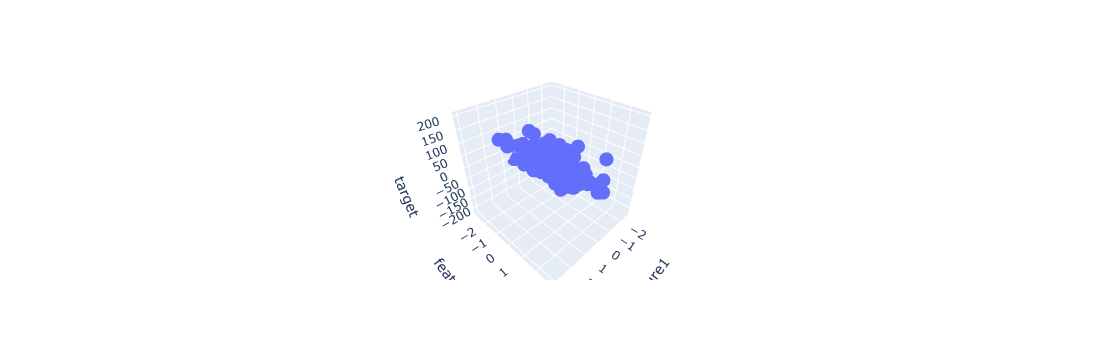

In [12]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
final=0

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 40.25319787257727
MSE 2754.4223628972595
R2 score 0.7245222525270711


In [27]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

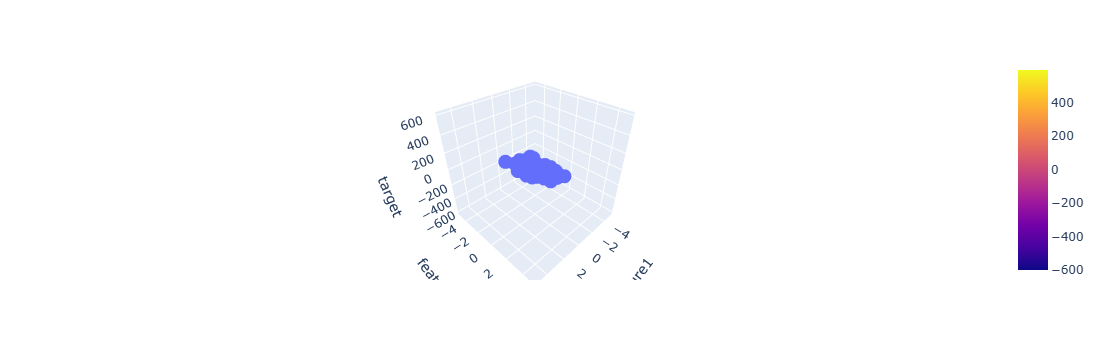

In [28]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [226]:
lr.coef_

array([59.64518074, 13.20409431])

In [227]:
lr.intercept_

-7.55491251398082